# Linear SVM

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.svm import SVC

In [22]:
iris=datasets.load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==2).astype(np.int)
svm_clf=Pipeline(
 [('std',StandardScaler()),
 ('line_svm',LinearSVC(C=0.1,loss='hinge'))
 ]
)
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('line_svm', LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [27]:
svm_clf.predict([X[1]])

array([0])

### LinearSVC,SVC是两个不同的函数，LinearSVC是只做线性的，SVC是包含了核函数的一个工具包

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_svm=Pipeline([
   ('poly',PolynomialFeatures(degree=3,)),
   ('std',StandardScaler()),
   ('svm',LinearSVC(C=10,loss='hinge'))
])
poly_svm.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [32]:
poly_svm.predict([X[100]])

array([1])

In [33]:
y[100]

1

In [34]:
poly_svm.named_steps.poly.n_output_features_

10

### 上面这个虽然能将二维数据转化为10个维度的数据，这个意思其实就和核函数所代表的意思很像了，在这里，我们来谈一下核函数的具体用法。

# Polynomial SVM

In [36]:
poly_svc=Pipeline([
('std',StandardScaler()),
    ('svc',SVC(C=10,kernel='poly'))
])
poly_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [37]:
poly_svc.predict([X[100]])

array([1])

In [38]:
y[100]

1

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,poly_svc.predict(X))

array([[97,  3],
       [ 3, 47]], dtype=int64)

# Large DataSet Support Vector Machine

In [40]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
iris=datasets.load_iris()
X=iris.data
y=iris.target
v_or_s=(y==1)|(y==0)
y=y[v_or_s]
X=X[v_or_s][:,(2,3)]
svc_iris=SVC(C=float('inf'),kernel='linear')
line_svc=LinearSVC(C=float('inf'))

In [41]:
svc_iris.fit(X,y)
svc_iris.predict([X[1]])

array([0])

In [42]:
line_svc.fit(X,y)
line_svc.predict([X[1]])

array([0])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
def plot_svm_margin(svm_model,xmin,xmax):
    x0_scale=np.linspace(xmin,xmax,200)
    [w]=svm_model.coef_
    [b]=svm_model.intercept_
    # change the model x0*wo+x1*w1+b=0 to x1=-(w0/w1)*x0-b/w1
    x1=-(w[0]/w[1])*x0_scale-b/w[1] # this line is max margin line
    # x0*w0+x1*w1+b=1 and x0*w0+x1*w1+b=-1 
    x1_up=x1+1/w[1]
    x1_down=x1-1/w[1]
    plt.xlim(xmin,xmax)
    plt.plot(x0_scale,x1,'-',label='margin')
    plt.plot(x0_scale,x1_up,'--',label='upper margin')
    plt.plot(x0_scale,x1_down,'--',label='lower margin')

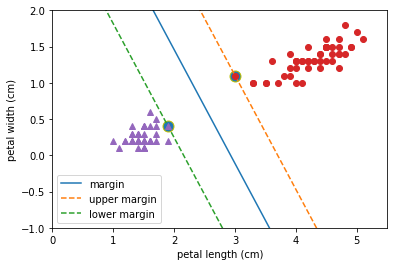

In [44]:
plt.scatter(svc_iris.support_vectors_[:,0],svc_iris.support_vectors_[:,1],s=120,edgecolors='y')
plot_svm_margin(svc_iris,0,5.5)
plt.legend(loc='lower left')
plt.plot(X[(y==1)][:,0],X[(y==1)][:,1],'o')
plt.plot(X[(y==0)][:,0],X[(y==0)][:,1],'^')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.ylim(-1,2)
plt.show()

# Sensitivity To Feature Scaled

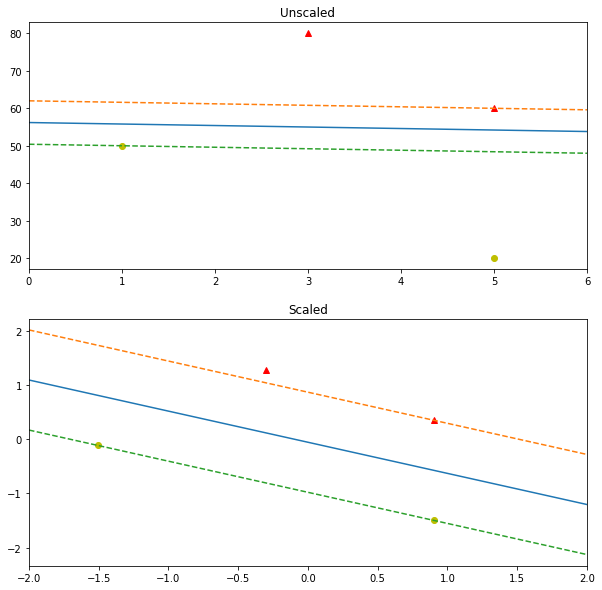

In [45]:
Xs=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float32)
ys=np.array([0,0,1,1])
svc_iris.fit(Xs,ys)
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(Xs[ys==0][:,0],Xs[ys==0][:,1],'yo')
plt.plot(Xs[ys==1][:,0],Xs[ys==1][:,1],'r^')
plot_svm_margin(svc_iris,0,6)
plt.title('Unscaled')
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
X_scale=sca.fit_transform(Xs)
svc_iris.fit(X_scale,ys)
plt.subplot(212)
plt.plot(X_scale[ys==0][:,0],X_scale[ys==0][:,1],'yo')
plt.plot(X_scale[ys==1][:,0],X_scale[ys==1][:,1],'r^')
plot_svm_margin(svc_iris,-2,2)
plt.title('Scaled')
plt.show()
plt.close()

### 你可以看到Scaled之后的，下边界的两个点都是支持向量，而上边界的的另一个点也接近支持向量了，Unscaled的点只有两个是支持向量，其他的均不是，支持向量机Sensitivity to Scaled

# Sensitivity To Outliners

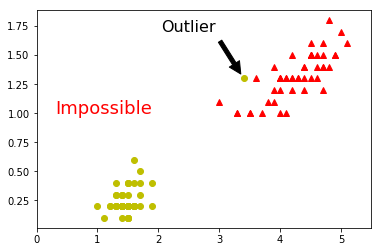

In [46]:
X_outliers=np.array([[3.4,1.3],[3.2,0.8]])
y_outliers=np.array([0,0])
Xo1=np.concatenate([X,X_outliers[:1]],axis=0)
yo1=np.concatenate([y,y_outliers[:1]],axis=0)
Xo2=np.concatenate([X,X_outliers[1:]],axis=0)
yo2=np.concatenate([y,y_outliers[1:]],axis=0)
# svm_outliners.fit(Xo1,yo1) 因为离群过远，所以这个是无法执行的
plt.xlim(0,5.5)
plt.text(0.3,1,'Impossible',fontsize=18,color='red')
plt.plot(Xo1[yo1==0][:,0],Xo1[yo1==0][:,1],'yo')
plt.plot(Xo1[yo1==1][:,0],Xo1[yo1==1][:,1],'r^')
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.show()
plt.close()

### 当线性svm的C无穷大时，这个是无法进行分类的，当然如果变成kernelized的SVM就可以进行分类了

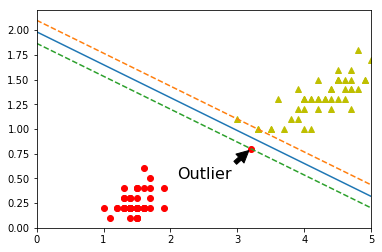

In [47]:
svm_outliers=SVC(C=float('inf'),kernel='linear')
svm_outliers.fit(Xo2,yo2)
plt.plot(Xo2[yo2==0][:,0],Xo2[yo2==0][:,1],'ro')
plt.plot(Xo2[yo2==1][:,0],Xo2[yo2==1][:,1],'y^')
plot_svm_margin(svm_outliers,0,5)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(2.5, 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.show()
plt.close()

### 与上面相比，虽然也是离群点，但是这个线性SVM是可以分割的

# Something about SVM

In [49]:
from sklearn.pipeline import Pipeline
scaler=StandardScaler()
svm_clf1=LinearSVC(C=1,loss='hinge',random_state=42)
svm_clf2=LinearSVC(C=100,loss='hinge',random_state=42)

scaled_svm_clf1=Pipeline([
('scaler',scaler),
('lsvc1',svm_clf1)
])

scaled_svm_clf2=Pipeline([
    ('scaler',scaler),
    ('lsvc2',svm_clf2)
])
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lsvc2', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

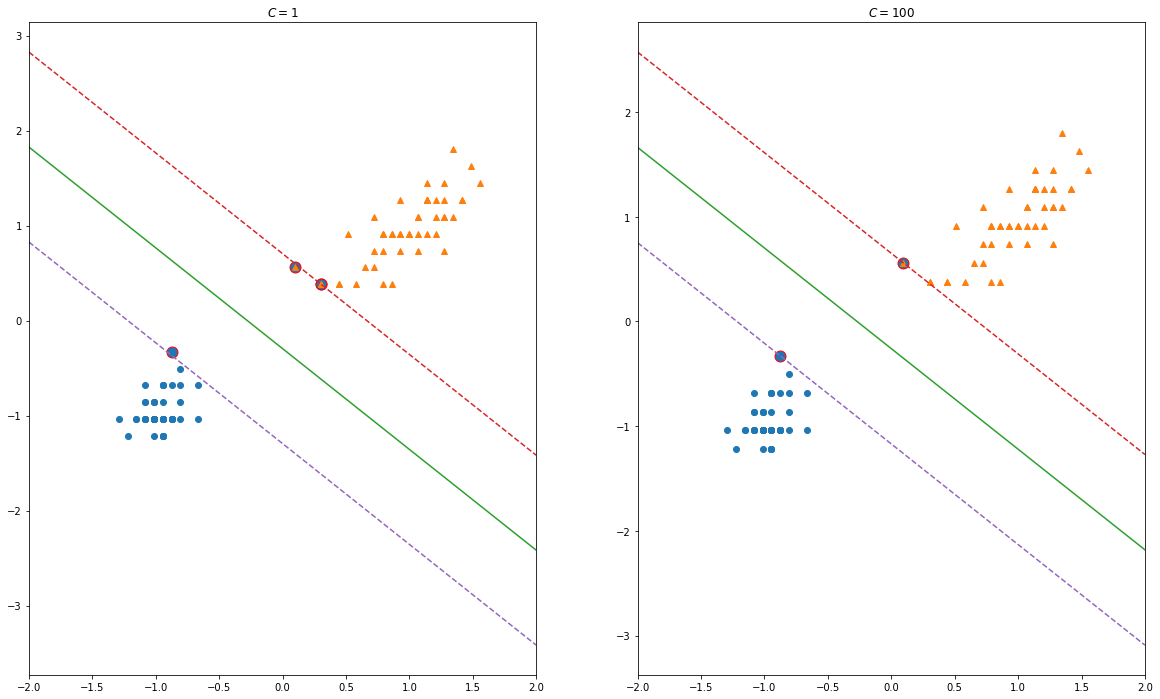

In [50]:
# 由于是soft max margin ，所以我们要找一下他的支持向量
X_scaler=scaler.fit_transform(X)
unsigned_distance=(2*y-1)*svm_clf1.decision_function(X_scaler)
svm_clf1.support_vectors_=X_scaler[unsigned_distance<=1]
unsigned_distance2=(2*y-1)*svm_clf2.decision_function(X_scaler)
svm_clf2.support_vectors_=X_scaler[unsigned_distance2<=1]
plt.figure(figsize=(20,12))
plt.subplot(121)
plt.plot(scaler.fit_transform(X)[y==0][:,0],scaler.fit_transform(X)[y==0][:,1],'o')
plt.plot(scaler.fit_transform(X)[y==1][:,0],scaler.fit_transform(X)[y==1][:,1],'^')
plt.scatter(svm_clf1.support_vectors_[:,0],svm_clf1.support_vectors_[:,1],s=120,edgecolors='r')
plot_svm_margin(svm_clf1,-2,2)
plt.title('$C={}$'.format(svm_clf1.C))
plt.subplot(122)
plt.plot(scaler.fit_transform(X)[y==0][:,0],scaler.fit_transform(X)[y==0][:,1],'o')
plt.plot(scaler.fit_transform(X)[y==1][:,0],scaler.fit_transform(X)[y==1][:,1],'^')
plt.scatter(svm_clf2.support_vectors_[:,0],svm_clf2.support_vectors_[:,1],s=120,edgecolors='r')
plot_svm_margin(svm_clf2,-2,2)
plt.title('$C={}$'.format(svm_clf2.C))
plt.show()
plt.close()

## 这个是Scaled之后的数据，看起来不是那么好看，我们看看没有Scaled的数据

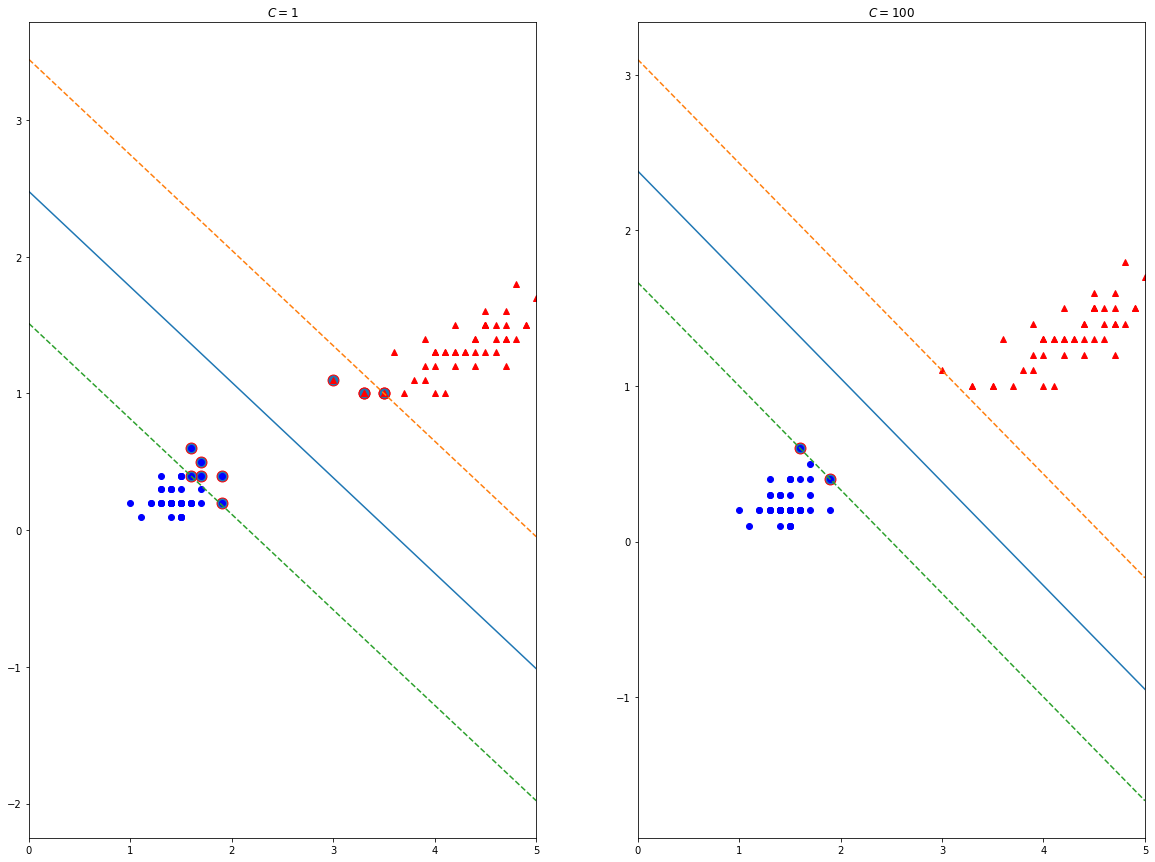

In [51]:
svm_clf1.fit(X,y)
svm_clf2.fit(X,y)
unsigned_distance1=(2*y-1)*svm_clf1.decision_function(X)
unsigned_distance2=(2*y-1)*svm_clf2.decision_function(X)
svm_clf1.support_vectors_=X[unsigned_distance1<=1]
svm_clf2.support_vectors_=X[unsigned_distance2<=1]
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.plot(X[y==0][:,0],X[y==0][:,1],'bo')
plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
plt.scatter(svm_clf1.support_vectors_[:,0],svm_clf1.support_vectors_[:,1],s=120,edgecolors='r')
plot_svm_margin(svm_clf1,0,5)
plt.title('$C={}$'.format(svm_clf1.C))
plt.subplot(122)
plt.plot(X[y==0][:,0],X[y==0][:,1],'bo')
plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
plt.scatter(svm_clf2.support_vectors_[:,0],svm_clf2.support_vectors_[:,1],s=120,edgecolors='r')
plt.title('$C={}$'.format(svm_clf2.C))
plot_svm_margin(svm_clf2,0,5)
plt.show()
plt.close()

### 这里就能很明显的看出来了，当C大时，就会把在外面的点，全部拉到分类平面外面去，所以在训练SVM模型的时候，如果出现了Overfiting,那就说明C设置的太大了，这个时候，就要采用grid_search来找更小的C，通过交叉验证，来确定合适的C

# Non-Linear Classfication

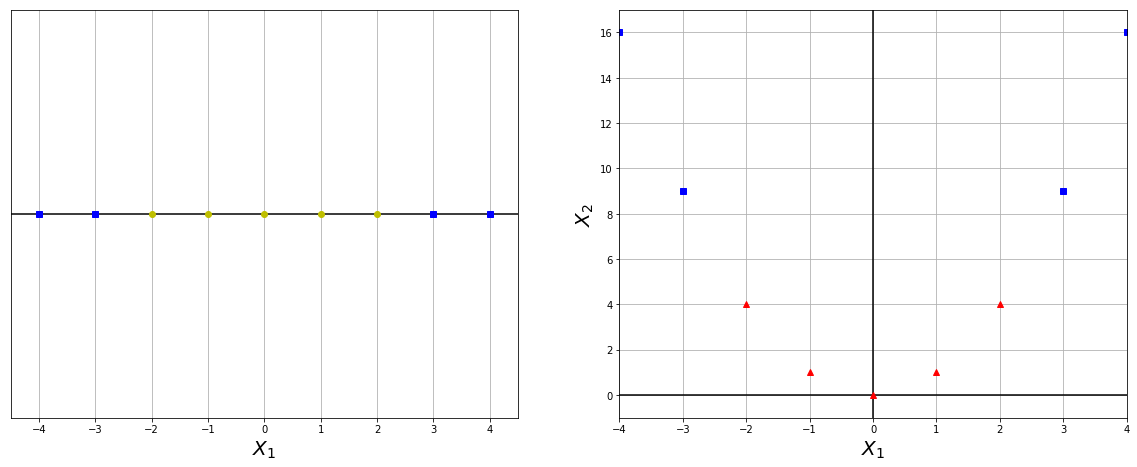

In [52]:
X1d=np.linspace(-4,4,9).reshape(-1,1) # 这个负数代表任意匹配，当想把一组数转化为行向量或者列向量，而不知道数组的长度时，就可以将列标签或者行标签mark为一个负数X1d
X2d=np.c_[X1d,X1d**2]
y=np.array([0,0,1,1,1,1,1,0,0])
# 开始绘图
plt.figure(figsize=(20,7.5))
plt.subplot(121)
plt.grid(True,which='both') # 画格子,both 代表画所有格子，major画主要的，mnior次要的
plt.axhline(y=0,color='k') # 将哪些线段加粗，axhine代表加粗X轴向的线，同时可以指定长度,通过xmin,xmax,plt.axvline是加粗y轴向的线
plt.plot(X1d[y==0],np.zeros_like(X1d[y==0]),'bs')
plt.plot(X1d[y==1],np.zeros_like(X1d[y==1]),'yo')
plt.gca().get_yaxis().set_ticks([]) # 把横向的网格设置为空白线条,这个有点麻烦，可以通过直接在plt.grid中指定axis(这个仅能把网格线去掉，不能去掉坐标轴是的数字标记)
plt.xlabel(r'$X_1$',fontsize=20)
plt.axis([-4.5,4.5,-0.2,0.2])

plt.subplot(122)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(X2d[y==0][:,0],X2d[y==0][:,1],'bs')
plt.plot(X2d[y==1][:,0],X2d[y==1][:,1],'r^')
plt.xlabel(r'$X_1$',fontsize=20)
plt.ylabel(r'$X_2$',fontsize=20)
plt.axis([-4,4,-1,17])
plt.show()
plt.close()

## 可以看到，在一维上不可用直线分割的线，在二维上就可以用直线来分隔，这个就称之为核方法(低维度线性不可分通过核方法（kerneled method）提升至高维度变成线性可分)，这里用的就是多项式核函数（polynomial kernel)

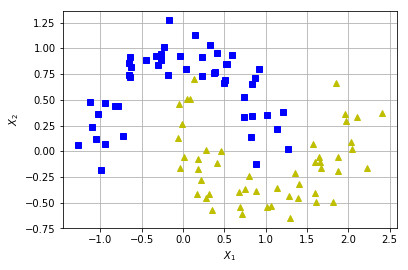

In [53]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,shuffle=True,noise=0.15,random_state=42)
def plot_dataset(X,y):
    plt.grid(True,which='both')
    plt.plot(X[y==0][:,0],X[y==0][:,1],'bs')
    plt.plot(X[y==1][:,0],X[y==1][:,1],'y^')
    plt.xlabel(r'$X_1$',fontsize=10)
    plt.ylabel(r'$X_2$',fontsize=10)
plot_dataset(X,y)
plt.show()
plt.close()

### 这个就无法使用线性函数来划分，这样就需要用到核技巧（kernel trick）来实现SVM

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
svm_pipe=Pipeline([
   ('poly',PolynomialFeatures(degree=3)),
   ('stand',StandardScaler()),
    ('svm_clf',LinearSVC(C=10,loss='hinge',random_state=42))
]
)
svm_pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('stand', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

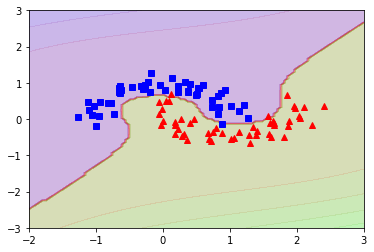

In [56]:
def plot_predictions(clf,axis_x,axis_y):
    x0s=np.linspace(axis_x[0],axis_x[1],100)
    x1s=np.linspace(axis_y[0],axis_y[1],100)
    x0,x1=np.meshgrid(x0s,x1s)
    X=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    y_decision=clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg,alpha=0.1)
plot_predictions(svm_pipe,[-2,3],[-3,3])
plt.plot(X[y==0][:,0],X[y==0][:,1],'bs')
plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
plt.show()
plt.close()

In [57]:
from sklearn.svm import SVC
svm_pipe1=Pipeline([
     ('std',StandardScaler()),
     ('svm',SVC(kernel='poly',degree=3,C=5,coef0=1))
])
svm_pipe1.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [58]:
svm_pipe2=Pipeline([
('std',StandardScaler()),
('svm',SVC(kernel='poly',degree=10,C=5,coef0=100))
])
svm_pipe2.fit(X,y)

Pipeline(memory=None,
     steps=[('std', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

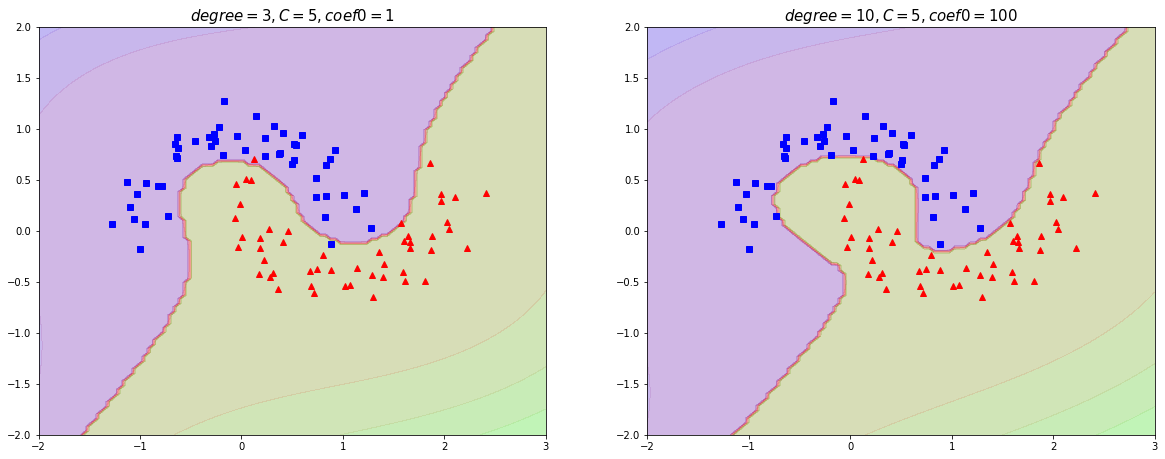

In [59]:
plt.figure(figsize=(20,7.5))
plt.subplot(121)
plot_predictions(svm_pipe1,[-2,3],[-2,2])
plt.plot(X[y==0][:,0],X[y==0][:,1],'bs')
plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
plt.title(r'$degree=3,C=5,coef0=1$',fontsize=15)
plt.subplot(122)
plot_predictions(svm_pipe2,[-2,3],[-2,2])
plt.plot(X[y==0][:,0],X[y==0][:,1],'bs')
plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
plt.title(r'$degree=10,C=5,coef0=100$',fontsize=15)

plt.show()
plt.close()

### 这里可以看出来，当degree大时，错分的情况就变少了，但是！！！很可能已经出现了overfitting,grid_search is a good choice

# Guassian RBF

### 实质上Guassian和Polynomial是一样的原理，就是将在低维上线性不可分的点利用function映射到高维，变成线性可分，kernel trick

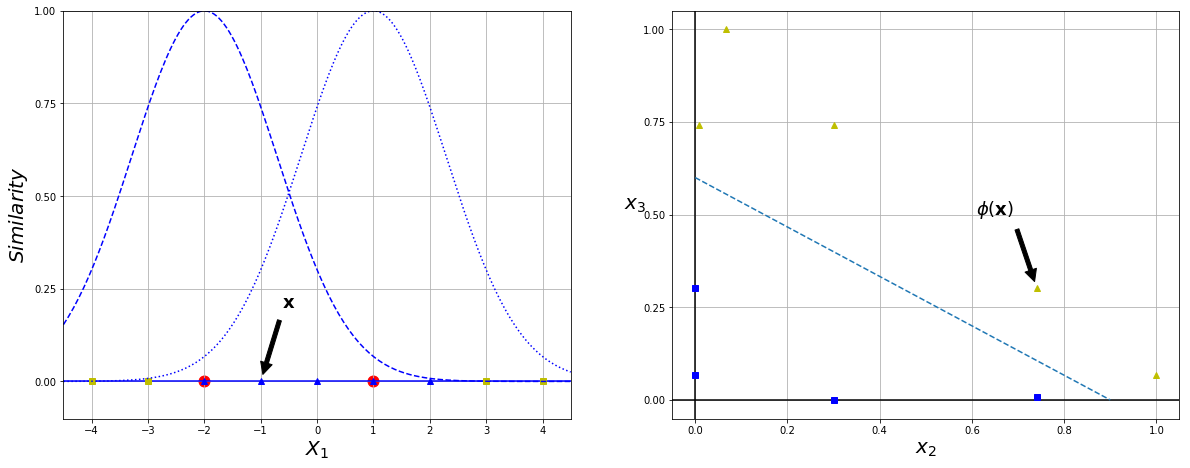

In [60]:
def guassian_function(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)
gamma=0.3

x1s=np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s=guassian_function(x1s,-2,gamma)
x3s=guassian_function(x1s,1,gamma)

X1d=np.linspace(-4,4,9).reshape(-1,1)
XK=np.c_[guassian_function(X1d,-2,gamma),guassian_function(X1d,1,gamma)]
YK=np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(20,7.5))
plt.subplot(121)
plt.grid(True,which='both')
plt.axhline(y=0,color='b')
plt.plot(X1d[YK==0],np.zeros_like(X1d[YK==0]),'ys')
plt.plot(X1d[YK==1],np.zeros_like(X1d[YK==1]),'b^')
plt.scatter([-2,1],[0,0],s=120,color='r')
plt.plot(x1s,x2s,'b--')
plt.plot(x1s,x3s,'b:')
plt.xlabel(r'$X_1$',fontsize=20)
plt.ylabel(r'$Similarity$',fontsize=20)
plt.gca().get_yaxis().set_ticks([0,0.25,0.5,0.75,1])
plt.annotate(r'$\mathbf{x}$',
             xy=(X1d[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.axis([-4.5,4.5,-0.1,1])


plt.subplot(122)
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.plot(XK[YK==0][:,0],XK[YK==0][:,1],'bs')
plt.plot(XK[YK==1][:,0],XK[YK==1][:,1],'y^')
plt.xlabel(r'$x_2$',fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([0,0.9],[0.6,0],'--')
plt.gca().get_yaxis().set_ticks([0,0.25,0.5,0.75,1])
plt.show()
plt.close()

In [61]:
x1_example=X1d[3,0]
landmarks=[-2,1]
for landmark in landmarks:
    [a]=guassian_function(np.array([[x1_example]]),np.array([[landmark]]),gamma)
    print('[{},{}]={}'.format(x1_example,landmark,a))

[-1.0,-2]=0.7408182206817179
[-1.0,1]=0.30119421191220214


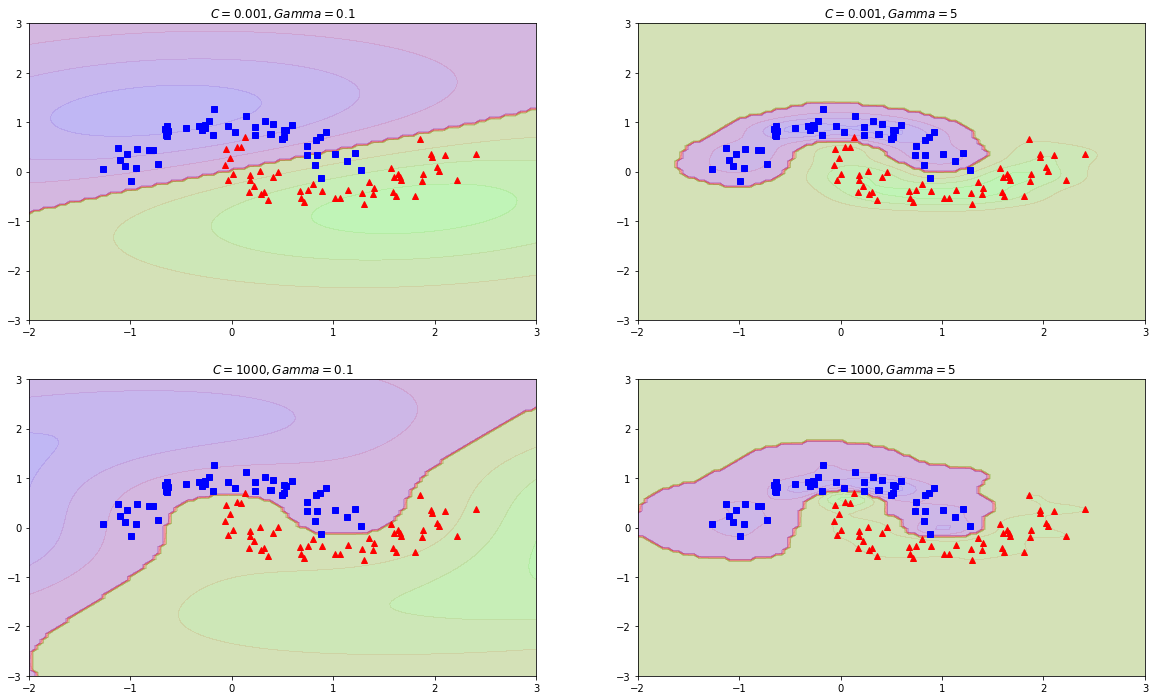

In [62]:
gamma1,gamma2=0.1,5
C1,C2=0.001,1000
hyperparameter=(C1,gamma1),(C1,gamma2),(C2,gamma1),(C2,gamma2)
svm_model=[]
for C,gamma in hyperparameter:
    svm_pipe=Pipeline([
    ('std',StandardScaler()),
    ('SVM',SVC(kernel='rbf',gamma=gamma,C=C))
    ])
    svm_pipe.fit(X,y)
    svm_model.append(svm_pipe)

plt.figure(figsize=(20,12))
for i in range(len(svm_model)):
    plt.subplot(221+i)
    plt.plot(X[y==0][:,0],X[y==0][:,1],'bs')
    plt.plot(X[y==1][:,0],X[y==1][:,1],'r^')
    plot_predictions(svm_model[i],[-2,3],[-3,3])
    plt.title(r'$C={},Gamma={}$'.format(svm_model[i].named_steps.SVM.C,svm_model[i].named_steps.SVM.gamma))
plt.show()
plt.close()

# Regression

In [126]:
np.random.seed(42)
m=50
X=2*np.random.rand(m,1)
y=(4+3*X+np.random.rand(m,1)).ravel()

In [127]:
svm_reg1=LinearSVR(epsilon=0.15,random_state=42)
svm_reg2=LinearSVR(epsilon=0.5,random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [128]:
def find_support_vector(reg,X,y):
    y_pred=reg.predict(X)
    support=(np.abs(y-y_pred)>=reg.epsilon)
    return np.argwhere(support)
svm_reg1.support_=find_support_vector(svm_reg1,X,y)
svm_reg2.support_=find_support_vector(svm_reg2,X,y)

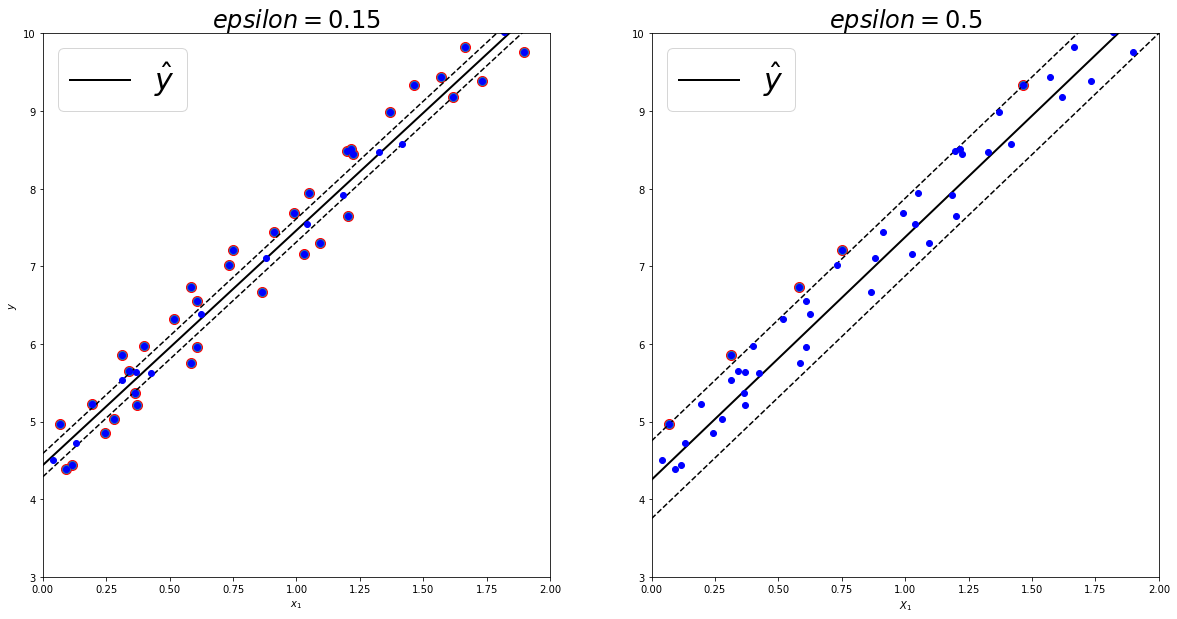

In [131]:
def plot_linear_svm(reg,X,y,axes):
    X_line=np.linspace(axes[0],axes[1],200).reshape(200,1)
    y_pred=reg.predict(X_line)
    plt.plot(X_line,y_pred,'k-',linewidth=2,label=r'$\hat{y}$')
    plt.plot(X_line,y_pred+reg.epsilon,'k--')
    plt.plot(X_line,y_pred-reg.epsilon,'k--')
    plt.scatter(X[reg.support_],y[reg.support_],s=100,edgecolors='r')
    plt.plot(X,y,'bo')
    plt.title(r'$epsilon={}$'.format(reg.epsilon),fontsize=24)
    plt.legend(loc='upper left',fontsize=30)
    plt.axis(axes)
plt.figure(figsize=(20,10))
plt.subplot(121)
plot_linear_svm(svm_reg1,X,y,[0,2,3,10])
plt.xlabel(r'$x_1$',fontsize=10)
plt.ylabel(r'$y$',fontsize=10)
plt.subplot(122)
plot_linear_svm(svm_reg2,X,y,[0,2,3,10])
plt.xlabel(r'$X_1$',fontsize=10)
plt.show()
plt.close()

In [139]:
np.random.seed(42)
m=100
X=(2*np.random.rand(m,1)-1).reshape(m,1)
y=(0.2+0.1*X+0.5*X**2+np.random.rand(m,1)/10).ravel()

In [150]:
from sklearn.svm import SVR
svr1=SVR(kernel='poly',epsilon=0.1,degree=2,C=0.01)
svr2=SVR(kernel='poly',epsilon=0.1,C=100,degree=2)
svr1.fit(X,y)
svr2.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

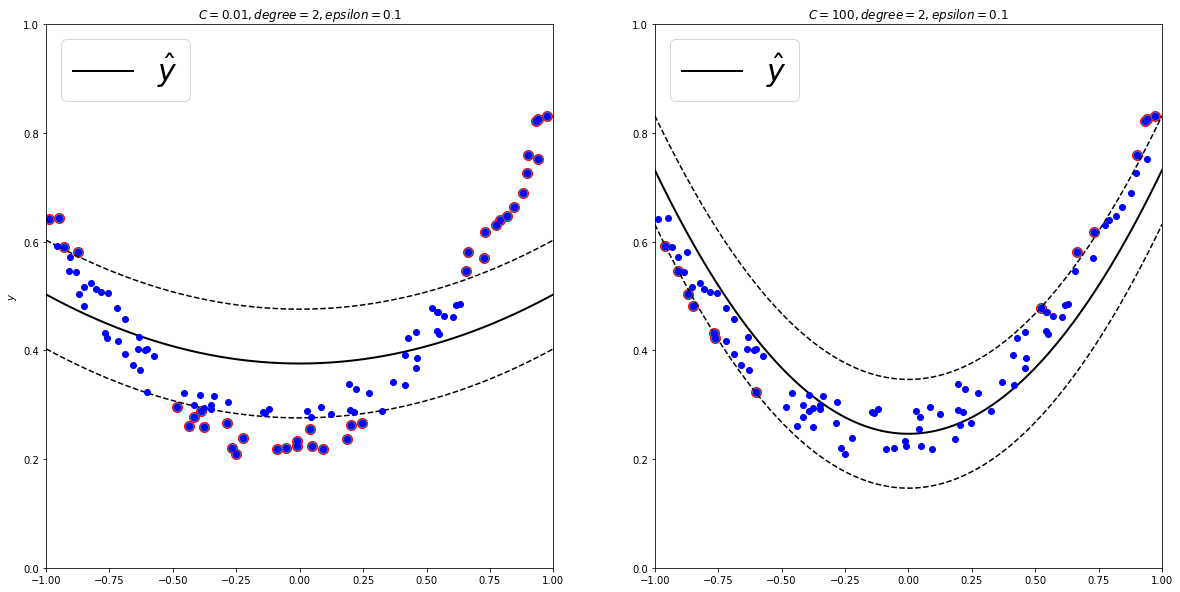

In [153]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plot_linear_svm(svr1,X,y,[-1,1,0,1])
plt.title(r'$C={},degree={},epsilon={}$'.format(svr1.C,svr1.degree,svr1.epsilon))
plt.ylabel(r'$y$')
plt.subplot(122)
plot_linear_svm(svr2,X,y,[-1,1,0,1])
plt.title(r'$C={},degree={},epsilon={}$'.format(svr2.C,svr2.degree,svr2.epsilon))
plt.show()
plt.close()